In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

In [3]:
sp = pd.read_csv('Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'

In [4]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [5]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [6]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [7]:
df = df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [8]:
df = df.dropna()

In [9]:
df.shape

(252, 2)

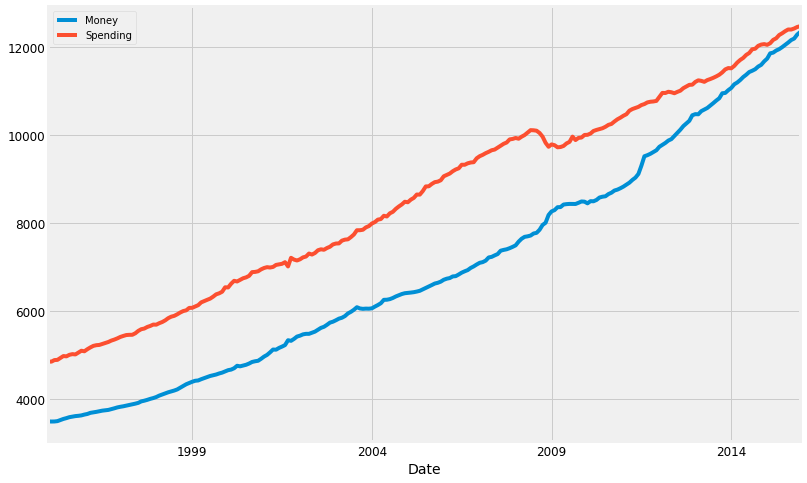

In [10]:
df.plot(figsize = (12,8));

<h3><i><b><u><font color ='red'>test for stationarity and go for any transformations</i></b></u></h3>

In [11]:
adfuller(df['Money'])
# pvalue = 1.0
# so pvalue >0.05 so we fail to reject(accept) null hypothesis so
# Money is non -  stationary

(4.239022425670652,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [12]:
adfuller(df['Spending'])
# pvalue = 0.96
# so pvalue >0.05 so we fail to reject(accept) null hypothesis so
# Spending is non - stationary

(0.1497960859862547,
 0.9693009944428312,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

In [13]:
df_transformed = df.diff()
df_transformed 

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


In [14]:
df_transformed = df_transformed.dropna()
adfuller(df_transformed['Money'])
# pvalue = 0.26
# so pvalue >0.05 so we fail to reject(accept) null hypothesis so
# Money is non - stationary
# as money is still non stationary after applying we have to apply
# one more time but it will loose the data as one row will be nan

(-2.057404049737941,
 0.26198379785112386,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.948346069441)

In [15]:
df_transformed = df_transformed.dropna()
adfuller(df_transformed['Spending'])
# pvalue = 2.04 * 10^-10
# so pvalue < 0.05 so we  reject null hypothesis so
# Spending is stationary

# so whenever we difference we loose one row of data

(-7.226973930850652,
 2.0410272592129196e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

In [16]:
# 2nd order differencing
df_transformed = df_transformed.diff().dropna()

In [17]:
df_transformed

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [18]:
adfuller(df_transformed['Money'])
# pvalue = 4.7 * 10^-10
# so pvalue <0.05 so we  to reject null hypothesis so
# Money is stationary

(-7.077470794343013,
 4.760674931296252e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

In [19]:
adfuller(df_transformed['Spending'])
# pvalue = 2.687 * 10^-10
# so pvalue < 0.05 so we  reject null hypothesis so
# Spending is stationary


(-8.760145426337708,
 2.687899967987339e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 2339.3283710766104)

<u><h3><i><font color='green'><b>money and spending both are stationary now</i></b></h3><u>

In [20]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [21]:
df_transformed.shape # 250 2 are less

(250, 2)

In [22]:
# No of Observations
nobs = 12

In [23]:
train = df_transformed[:-nobs]

In [24]:
train.shape

(238, 2)

In [25]:
test = df_transformed[-nobs:]

In [26]:
test.shape

(12, 2)

# GRIDSEARCH FOR ORDER p AR of VAR model

In [27]:
model = VAR(train)
for p in range(8):
    results = model.fit(maxlags=p)
    print(f'ORDER : {p}')
    print(f'AIC : {results.aic}')
    print()

ORDER : 0
AIC : 14.74710921809045

ORDER : 1
AIC : 14.178610495220896

ORDER : 2
AIC : 13.955189367163703

ORDER : 3
AIC : 13.849518291541038

ORDER : 4
AIC : 13.827950574458281

ORDER : 5
AIC : 13.78730034460964

ORDER : 6
AIC : 13.799076756885809

ORDER : 7
AIC : 13.797638727913972



<u><h3><i><b><font color ='purple'>choose order 5 as its AIC value is less

In [28]:
results = model.fit(5)

In [29]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 11, Apr, 2021
Time:                     12:05:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [30]:
# Grab 5 lagged values,right before the test starts in form of numpy array


In [31]:
lagged_values = train.values[-5:] # shape (5,2)

In [32]:
# p = 5
# k =2 (Money,Spending)

z = results.forecast(y=lagged_values, steps = 12)

In [33]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [34]:
idx = pd.date_range('2015-01-01',periods = 12,freq='MS')
# where test set starts

In [35]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [36]:
df_forecast = pd.DataFrame(data=z,index = idx,columns = ['Money_2d','Spending_2d'])

In [37]:
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [38]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [39]:
# reverse 1st difference and 2nd difference

# Add the most recent first difference form the training side of the original dataset to the forecast
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d']

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [40]:
# reverse 1st difference and 2nd difference

# Add the most recent first difference form the training side of the original dataset to the forecast
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d']

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [41]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,75.425962,11807.130686,-0.850298,12107.899522
2015-03-01,-0.377725,-6.684969,78.222275,11885.352961,3.915031,12111.814552
2015-04-01,-2.602233,5.479458,75.997767,11961.350728,16.079458,12127.894010
2015-05-01,4.228557,-2.443365,82.828557,12044.179285,8.156635,12136.050645


In [42]:
df_forecast.tail()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-08-01,0.364510,-2.356101,78.964510,12280.904779,8.243899,12169.765863
2015-09-01,-1.210627,-1.224147,77.389373,12358.294151,9.375853,12179.141716
2015-10-01,0.225877,0.786927,78.825877,12437.120028,11.386927,12190.528643
2015-11-01,1.338939,0.180974,79.938939,12517.058967,10.780974,12201.309618
2015-12-01,-0.218585,0.212750,78.381415,12595.440383,10.812750,12212.122368


In [43]:
test_range = df[-nobs:]

In [46]:
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


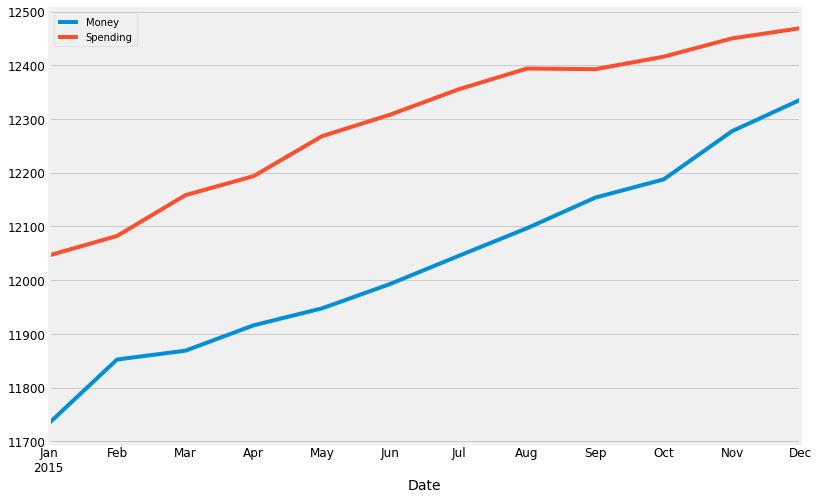

In [44]:
test_range.plot(figsize=(12,8));

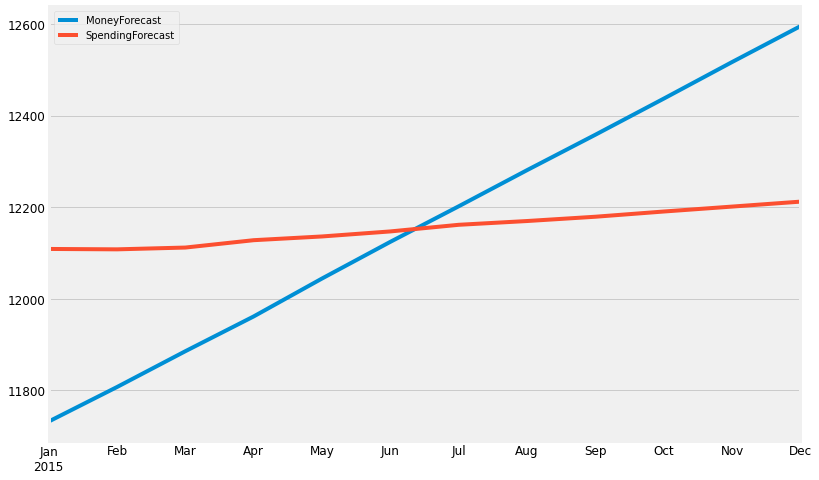

In [45]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(12,8));

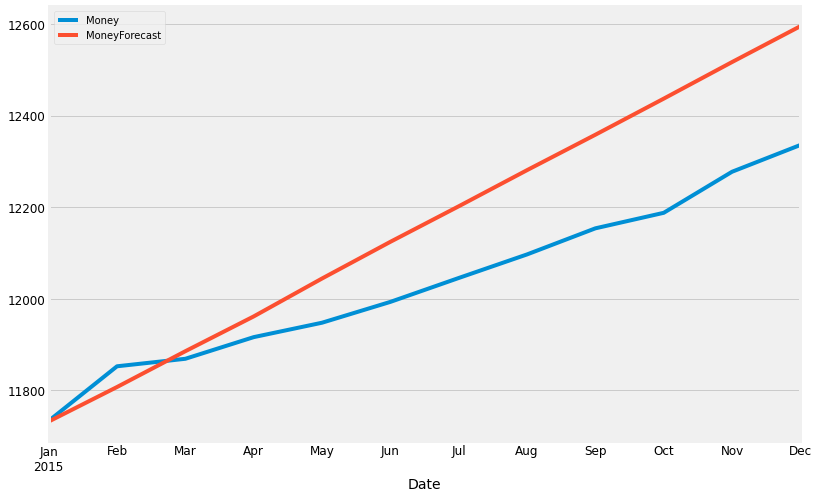

In [47]:
test_range['Money'].plot(legend=True,figsize = (12,8))
df_forecast['MoneyForecast'].plot(legend=True);

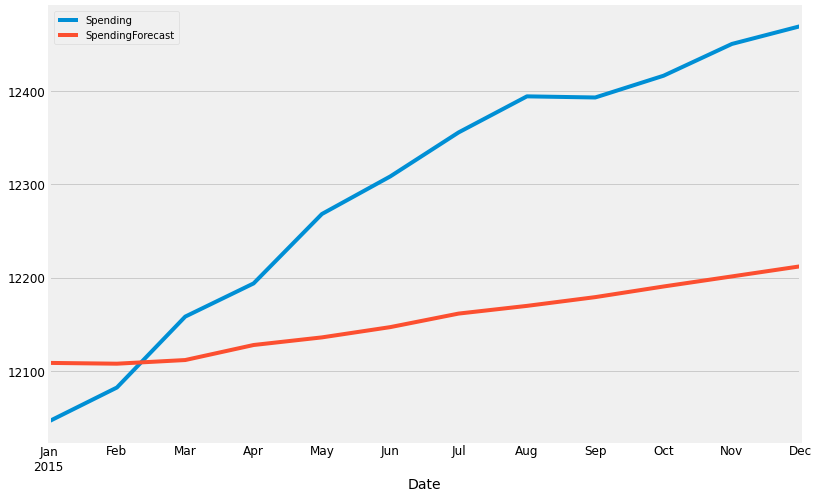

In [48]:
test_range['Spending'].plot(legend=True,figsize = (12,8))
df_forecast['SpendingForecast'].plot(legend=True);

In [49]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

162.83450369493715

In [51]:
test_range['Money'].mean()

12034.008333333333

In [52]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

174.85011040665987

In [53]:
test_range['Spending'].mean()

12294.533333333333